# Setup and minor Data Cleaning

In [294]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
df = pd.read_csv('Mental Health Dataset.csv')
df.columns = df.columns.str.lower()
df['counts'] = df.groupby('country')['country'].transform('count')
df_all = df
df = df.loc[df['country'].isin(["Sweden","United States","United Kingdom"])]


In [326]:
df = df.rename(columns={'treatment': 'treatment_sought'})

In [327]:
df

,timestamp,gender,country,occupation,self_employed,family_history,treatment_sought,days_indoors,growing_stress,changes_habits,mental_health_history,mood_swings,coping_struggles,work_interest,social_weakness,mental_health_interview,care_options,counts
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure,171308
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No,171308
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes,171308
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes,171308
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes,171308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292358,5/6/2015 16:55,Male,United States,Business,No,No,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure,171308
292359,7/27/2015 23:25,Male,United States,Business,Yes,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,Maybe,Not sure,171308
292361,8/25/2015 19:59,Male,United States,Business,No,Yes,No,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,No,171308
292362,9/26/2015 1:07,Male,United States,Business,No,Yes,Yes,15-30 days,No,Maybe,No,Low,Yes,No,Maybe,No,Yes,171308


In [150]:
color_palette = ["#D32C6B", "#2CD394", "#BFD32C","#402CD3", "#BDBDBD"]

In [151]:
sns.set_palette(color_palette)

In [222]:
sns.color_palette()
start_color = "#ffffff"
end_color = "#BFD32C"
color_cmap = LinearSegmentedColormap.from_list("custom_cmap", [start_color, end_color])

In [228]:
# Convert hexadecimal color code to RGB format
hex_color = '#2CD394'
rgb_color = plt.matplotlib.colors.hex2color(hex_color)

# Generate some sample data
data = np.random.rand(10, 10)

# Define a custom colormap with alpha values ranging from 0 (transparent) to 1 (opaque)
colors = [(1, 1, 1, 0)] + [(*rgb_color, i) for i in np.linspace(0, 1, 256)]
custom_cmap = plt.matplotlib.colors.LinearSegmentedColormap.from_list("CustomMap", colors)

# Generate a Bar plot

In [408]:
def white_bar_plot(df, country=None, group_col=None, value_col=None, norm=False):
    """
    Plot a bar plot with white text and a gray background.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - country (str, optional): The country to filter the data for. If not provided, plots for all countries.
    - group_col (str, optional): The column to group the data by and display on the x-axis.
    - value_col (str, optional): The column containing the values to display as bars or hues.

    Returns:
    - None
    """
    if country:
        # Filter data for the specified country
        country_data = df.loc[df["country"] == country]
    else:
        # Use the entire dataset if country is not provided
        country_data = df.copy()
    
    if group_col and value_col:
        # Group data by group_col and count occurrences of value_col
        country_treatment_counts = country_data.groupby([group_col])[value_col].value_counts(normalize=norm).unstack().fillna(0).reset_index()

        # Prepare title string
        title_str = f'{value_col.title().replace("_", " ")} by {group_col.title().replace("_", " ")} \n {country.title() if country else ""}'

        # Plot using Seaborn
        plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
        sns.barplot(data=country_treatment_counts.melt(id_vars=group_col), x=group_col, y='value', hue=value_col, linewidth=0)
        plt.title(country, color='white', fontsize=25,fontname = 'Verdana')
        plt.xlabel('', color='white')
        plt.ylabel('Number of Individuals', color='white')
        
        # Change y-ticks to full number percent if normalized
        if norm:
            plt.ylabel('')
            def percent_formatter(x, pos):
                return f'{x*100:.0f}%'

            # Apply the custom formatter to the y-axis ticks
            plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(percent_formatter))
            plt.ylim(0,1)
            
        # Remove spines
        sns.despine()

        # Invert text color to white
        plt.gca().tick_params(axis='x', colors='white')
        plt.gca().tick_params(axis='y', colors='white')

        # Set spines color to white
        plt.gca().spines['bottom'].set_color('white')
        plt.gca().spines['left'].set_color('white')

        # Set legend text color to white and remove legend box
        legend = plt.legend(title=f'{value_col.title().replace("_", " ")}', frameon=False, bbox_to_anchor=(1, 1))
        legend.get_title().set_color('white')
        for text in legend.get_texts():
            text.set_color('white')

        # Save as PNG with 300 DPI resolution and transparent background
        plt.savefig(f'{value_col}_by_{group_col}_{country}.png', dpi=300, bbox_inches='tight', transparent=True)

        plt.show()
    else:
        print("Please provide values for group_col and value_col.")


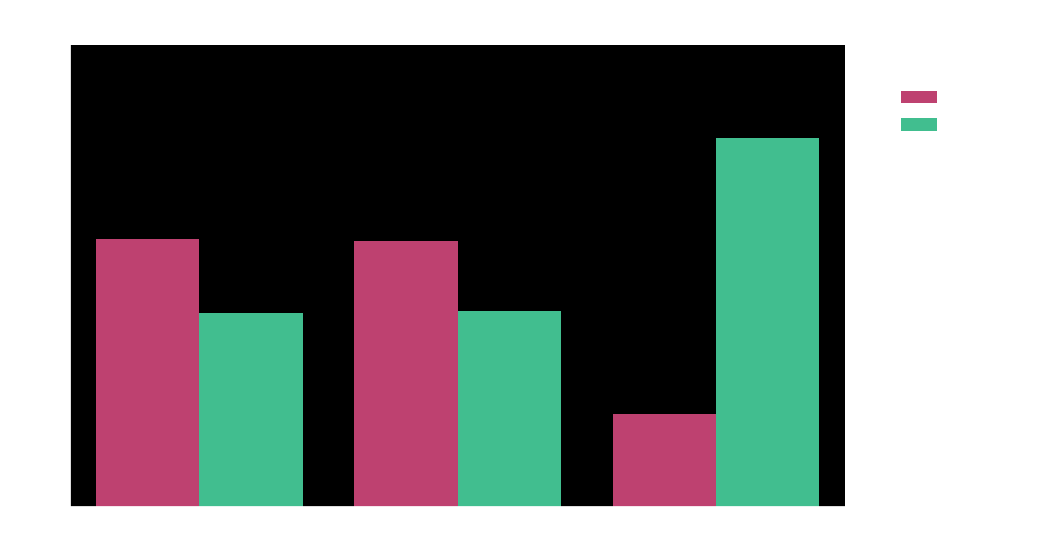

In [409]:
white_bar_plot(df,country='United Kingdom', group_col='care_options', value_col='treatment_sought', norm=True)

# Generate a Heatmap

In [412]:
def white_heatmap(df, country=None, group_col=None, value_col=None):
    """
    Plot a heatmap with white text and a gray background.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - country (str, optional): The country to filter the data for. If not provided, plots for all countries.
    - group_col (str, optional): The column to group the data by and display on the x-axis.
    - value_col (str, optional): The column containing the values to display as bars or hues.

    Returns:
    - None
    """
    if country:
        # Filter data for the specified country
        country_data = df[df["country"] == country]
    else:
        # Use the entire dataset if country is not provided
        country_data = df.copy()
    
    if group_col and value_col:
        # Group data by group_col and count occurrences of value_col
        country_counts = country_data.groupby([group_col])[value_col].value_counts(normalize=True).unstack(-2).fillna(0)

        # Prepare title string
        title_str = f'{value_col.title().replace("_", " ")} by {group_col.title().replace("_", " ")}\n{country.title() if country else "All Countries"}'

        # Custom formatting function
        def custom_format(x):
            return f'{x*100:.0f}%'

        # Plot using Seaborn heatmap
        plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
        sns.heatmap(country_counts, cmap=custom_cmap, annot=True, fmt=".2f", linewidths=0, cbar=False, annot_kws={"color": "white"})
        plt.title('')#country, color='white', fontsize=25, fontname = 'Verdana')
        plt.ylabel(value_col.title().replace("_", " "), color='white',fontname = 'Verdana')
        plt.xlabel('')#group_col.title().replace("_", " "), color='white',fontname = 'Verdana')

        # Apply custom formatting to annotations
        ax = plt.gca()
        for t in ax.texts:
            t.set_fontsize(20)  # Adjust the font size as needed
            t.set_fontname("Verdana")  # Change the font to Verdana or any other desired font
            # Apply custom formatting to annotations
            t.set_text(custom_format(float(t.get_text())))  # Assuming custom_format is defined earlier

        # Set the font for x and y tick labels
        for tick in ax.get_xticklabels() + ax.get_yticklabels():
            tick.set_fontsize(16)  # Adjust the font size as needed
            tick.set_fontname("Verdana")  # Change the font to Verdana or any other desired font


        # Save as PNG with 300 DPI resolution and transparent background
        plt.savefig(f'{value_col}_by_{group_col}_{country}_heatmap.png', dpi=300, bbox_inches='tight', transparent=True)

        plt.show()
    else:
        print("Please provide values for group_col and value_col.")


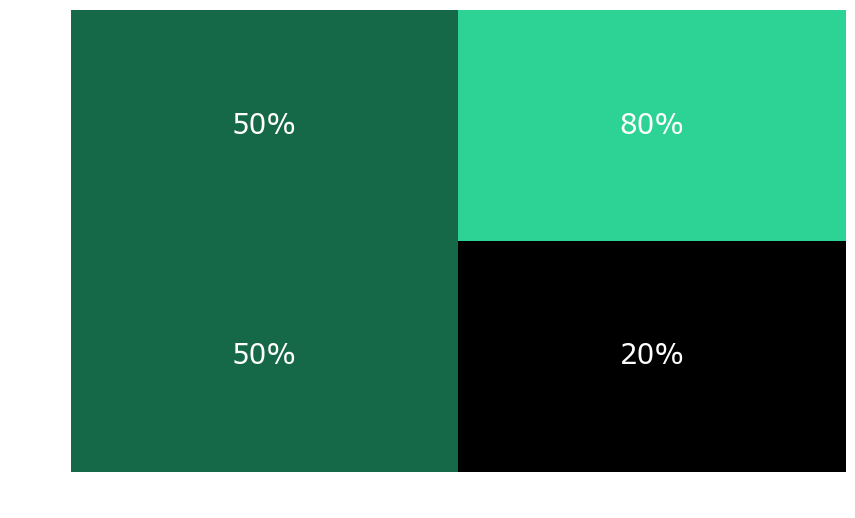

In [415]:
white_heatmap(df,country='Sweden',group_col='gender',value_col='treatment_sought')